# Python Project to Predict Bank Product Uptake

* The classification goal is to predict if the client will Subscribe a term deposit (variable y) or Not.
* The data is related with direct marketing campaigns of a Bank based on several phone calls made to their
* clients to market their term deposit product.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv(r'C:\Users\adere\Downloads\bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [6]:
# Check for missing values
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [7]:
# Check the Descriptive Statistics
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522
unique,68,13,4,5,3,2354,3,3,4,32,13,876,33,293,25,5,3
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


### The data has 4521 rows and 17 columns

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [9]:
#data cleasning cells
# Making sense of Target column 'y'
# Write a function that labels 'y' column properly to 'subscribed' and 'unsubscribed'

def subscribe(z):
    if z == 'no':
        return 'Unsubscribed'
    else:
        return 'Subscribed'
    
data['Subscription_status'] = data['y'].apply(subscribe)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Subscription_status
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Unsubscribed
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Unsubscribed
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Unsubscribed
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Unsubscribed
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Unsubscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Unsubscribed
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Unsubscribed
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Unsubscribed
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Unsubscribed


In [10]:
# Removing or deleting unnecessary records(columns)
# Drop the replaced 'y' column to avoid redundancy
data.drop(['y'], axis=1, inplace=True)

In [11]:
#checking our data again to confirm the dropped column
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_status
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,Unsubscribed
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,Unsubscribed
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,Unsubscribed
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,Unsubscribed
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,Unsubscribed


In [12]:
#check distribution of values in the target column.
data.Subscription_status.value_counts()

Unsubscribed    4000
Subscribed       521
Name: Subscription_status, dtype: int64

In [13]:
# To check the target column distribution in percentages using (normalize=True)
data['Subscription_status'].value_counts(normalize=True)

Unsubscribed    0.88476
Subscribed      0.11524
Name: Subscription_status, dtype: float64

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

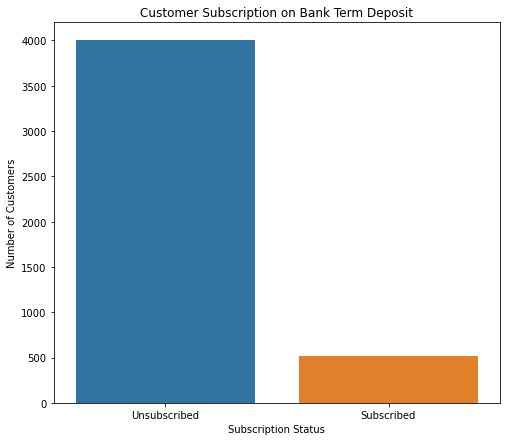

In [14]:
#univariate analysis cells
# Distribution of 'Subscription_status' to display 'Subscribed' and 'Unsubscribed'

plt.figure (figsize=(8, 7))
plt.title('Customer Subscription on Bank Term Deposit')
sns.countplot(x = 'Subscription_status',data=data )
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')
plt.show()

Text(0, 0.5, 'Number of Customers')

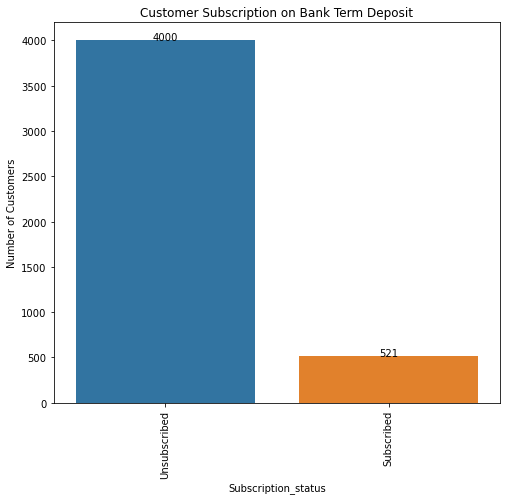

In [15]:
# Creating visualization of 'Subscribed' and 'Unsubscribed' with label 

fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='Subscription_status', data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Customer Subscription on Bank Term Deposit')
plt.ylabel('Number of Customers')

In [16]:
#univariate analysis cells
#check values in work class column with value_counts()
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [17]:

data['job'].value_counts(normalize=True)

management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64

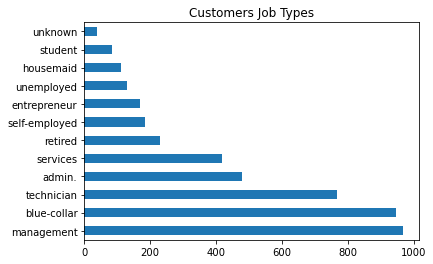

In [18]:
data.job.value_counts().plot.barh()
plt.title('Customers Job Types')
plt.show()

In [19]:
#univariate analysis cells
# Distribution of Marital Status
Marital_percentage = (data['marital'].value_counts()/data.shape[0]*100).round(2)
Marital_percentage

married     61.87
single      26.45
divorced    11.68
Name: marital, dtype: float64

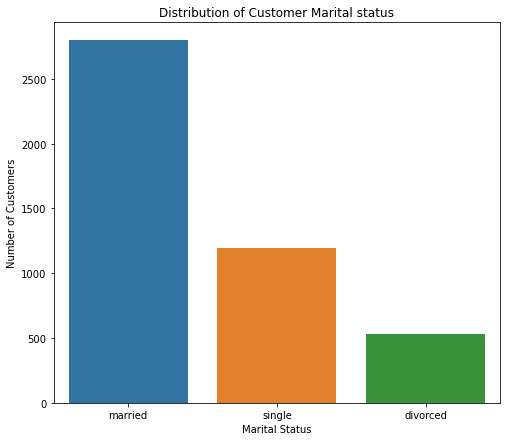

In [20]:
# Distribution of Customer Marital status 

plt.figure (figsize=(8,7))
plt.title('Distribution of Customer Marital status')
sns.countplot(x = 'marital',data=data )
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

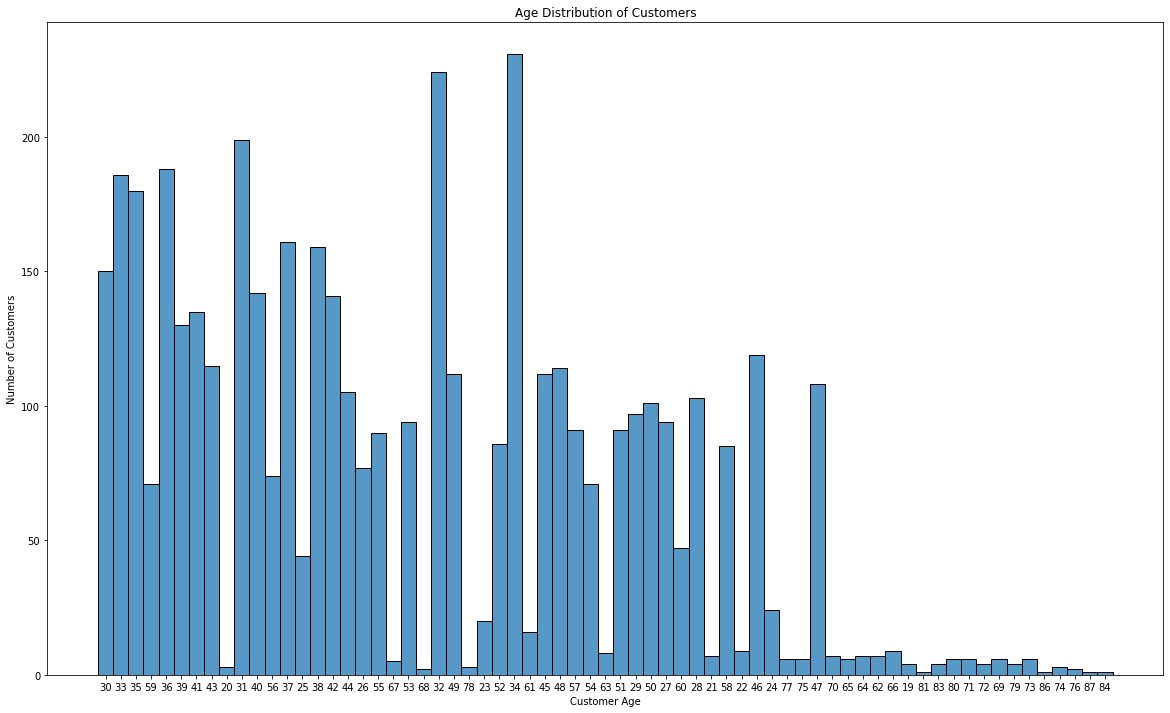

In [21]:
# Distribution of Age 
plt.figure (figsize=(20,12))
plt.title('Age Distribution of Customers')
sns.histplot(x = 'age',data=data )
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.show()

In [22]:
# Distribution of Educational experience/level
Education_percentage = (data['education'].value_counts()/data.shape[0]*100).round(2)
Education_percentage

secondary    51.01
tertiary     29.86
primary      15.00
unknown       4.14
Name: education, dtype: float64

Text(0, 0.5, 'Number of Customers')

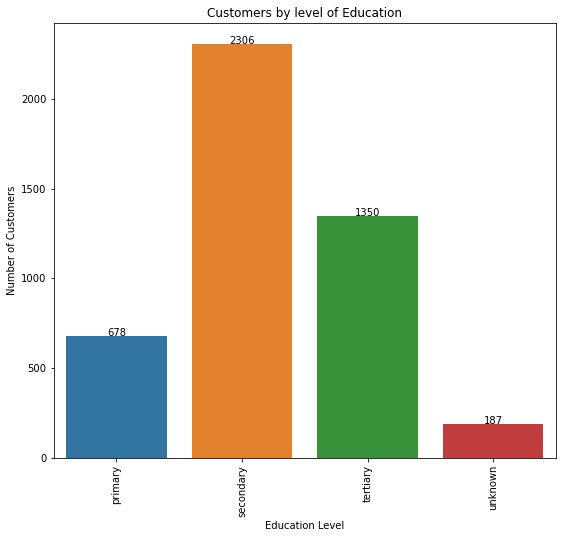

In [23]:
# Distribution of Customers by level of Education

fig, ax1 = plt.subplots(figsize = (9, 8))
viz = sns.countplot(ax=ax1, x='education', data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Customers by level of Education')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

In [24]:
# Distribution based on loan Defaulted 
Default_percentage = (data['default'].value_counts()/data.shape[0]*100).round(2)
Default_percentage

no     98.32
yes     1.68
Name: default, dtype: float64

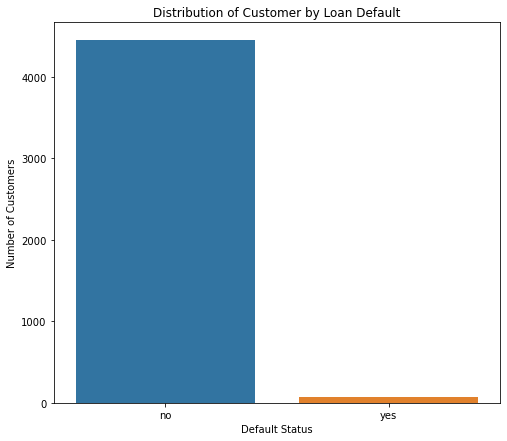

In [25]:
plt.figure (figsize=(8, 7))
plt.title('Distribution of Customer by Loan Default')
sns.countplot(x = 'default',data=data )
plt.xlabel('Default Status')
plt.ylabel('Number of Customers')
plt.show()


In [26]:
# Distribution of Customers with Existing Personal loan

loan_percentage = (data['loan'].value_counts()/data.shape[0]*100).round(2)
loan_percentage

no     84.72
yes    15.28
Name: loan, dtype: float64

Text(0, 0.5, 'Number of Customers')

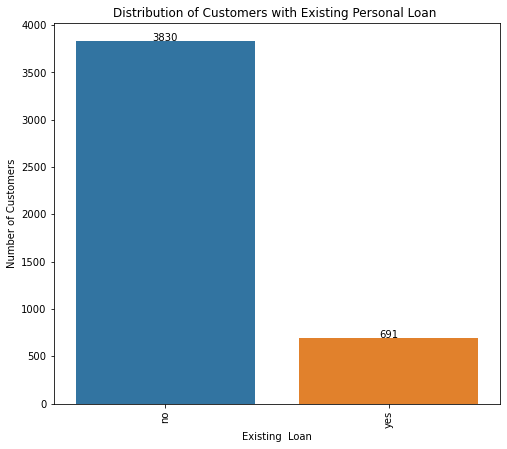

In [27]:
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='loan', data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Distribution of Customers with Existing Personal Loan ')
plt.xlabel('Existing  Loan')
plt.ylabel('Number of Customers')

In [28]:
# Distribution of Customers with Existing Housing  loan/Mortgage 

Housing_percentage = (data['housing'].value_counts()/data.shape[0]*100).round(2)
Housing_percentage

yes    56.6
no     43.4
Name: housing, dtype: float64

Text(0, 0.5, 'Number of Customers')

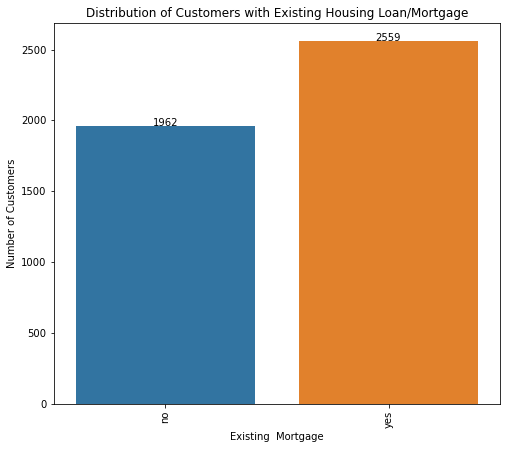

In [29]:
fig, ax1 = plt.subplots(figsize = (8, 7))
viz = sns.countplot(ax=ax1, x='housing', data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Distribution of Customers with Existing Housing Loan/Mortgage')
plt.xlabel('Existing  Mortgage')
plt.ylabel('Number of Customers')

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0, 0.5, 'Numbers of Subscription')

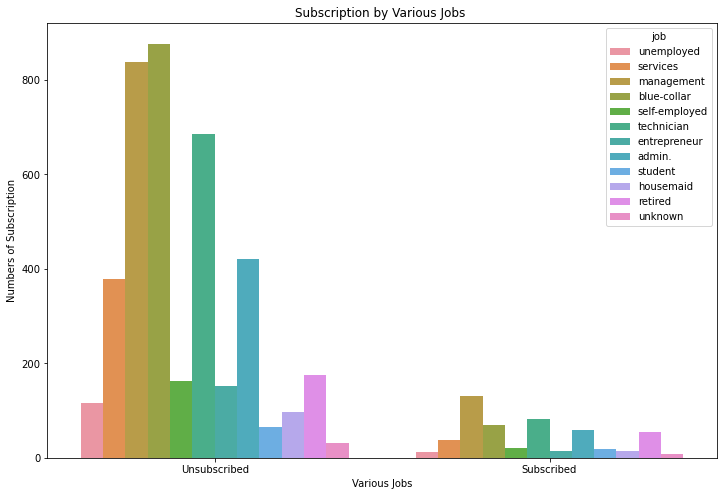

In [31]:
# Display Number of Subscription by Various Jobs
plt.figure(figsize=(12,8))
plt.title('Subscription by Various Jobs ')
sns.countplot(x='Subscription_status', data=data, hue='job')
plt.xlabel('Various Jobs')
plt.ylabel('Numbers of Subscription')

In [32]:
#bivariate analysis cells
# Crosstab Display of Subscription  by Marital Status
Subscription_marital_pivot = pd.crosstab(data.marital,data.Subscription_status ,normalize='index')
display(Subscription_marital_pivot)

Subscription_status,Subscribed,Unsubscribed
marital,,
divorced,0.145833,0.854167
married,0.099035,0.900965
single,0.139632,0.860368


Text(0, 0.5, 'Count of Subscription')

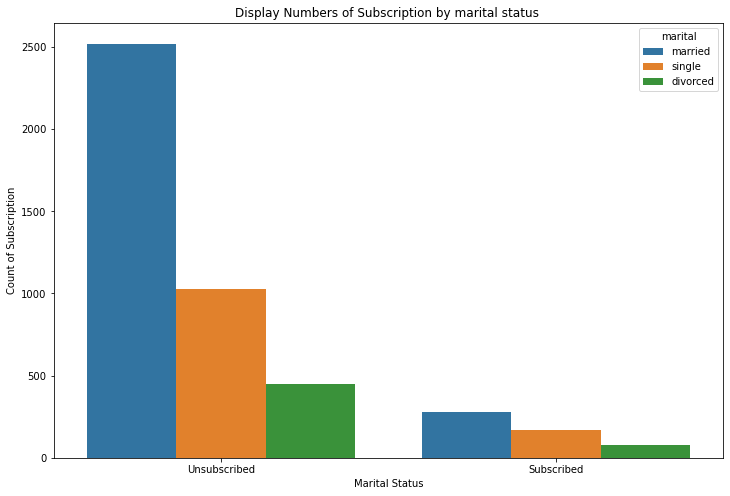

In [33]:
#bivariate analysis cells
# Display of Subscription  by Marital Status
plt.figure(figsize=(12,8))
plt.title('Display Numbers of Subscription by marital status ')
sns.countplot(x='Subscription_status', data=data, hue='marital')
plt.xlabel('Marital Status')
plt.ylabel('Count of Subscription')

In [34]:
# Display Crosstab of Subscription status by Existing loan 
Subscription_loan_pivot = pd.crosstab(data.loan,data.Subscription_status ,normalize='index')
display(Subscription_loan_pivot)

Subscription_status,Subscribed,Unsubscribed
loan,,
no,0.124804,0.875196
yes,0.062229,0.937771


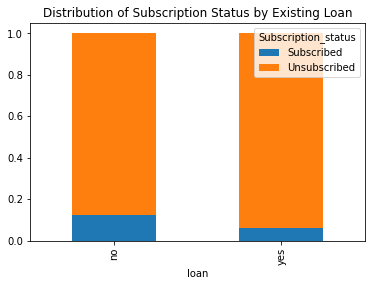

In [35]:
#bivariate analysis cellsstatus
# Display of Subscription  by Existing Loan



#create pivot of Subscription_status  and loan
Subscription_loan_pivot = pd.crosstab(data.loan,data.Subscription_status ,normalize='index')

#plot the data
Subscription_loan_pivot.plot.bar(stacked=True)

plt.title('Distribution of Subscription Status by Existing Loan')
plt.show()

In [36]:
# Crosstab Display Subscription  by Educational Level
subscription_education_pivot = pd.crosstab(data.Subscription_status,data.education,normalize='index')
display(subscription_education_pivot)

education,primary,secondary,tertiary,unknown
Subscription_status,,,,
Subscribed,0.122841,0.47025,0.370441,0.036468
Unsubscribed,0.153500,0.51525,0.289250,0.042000


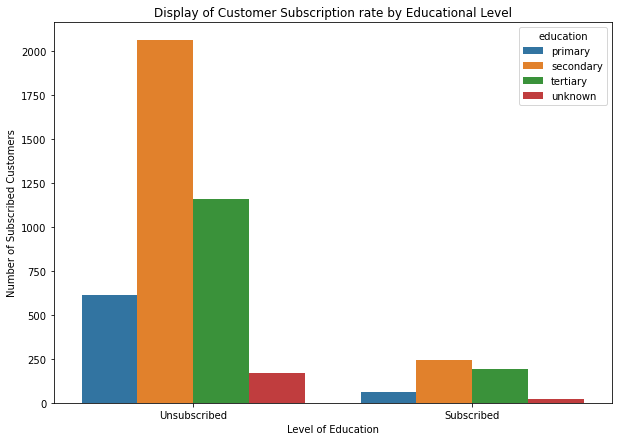

In [37]:
#bivariate analysis cells
# Display of Subscription  by Educational Level

plt.figure (figsize=(10,7))
plt.title('Display of Customer Subscription rate by Educational Level')
sns.countplot(x = 'Subscription_status',data=data, hue='education')
plt.xlabel('Level of Education')
plt.ylabel('Number of Subscribed Customers')
plt.show()

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [38]:
sns.set()

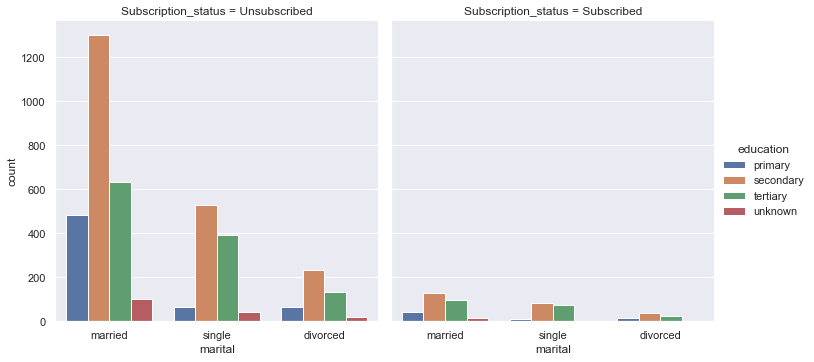

In [40]:
#multivariate analysis cells
# Display of Subscription Status by Education and Marital
sns.catplot(col='Subscription_status', x='marital', hue='education', data=data, kind='count')

In [41]:
#multivariate analysis cells
sns.pairplot(data)

ValueError: No variables found for grid columns.

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 720x720 with 0 Axes>

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. Only about 12 percent  of the entire 4,521 records subscribed to the Term Deposit
2. Most subscribed customers are those with secondary and tertiary educational background. 
3. Most subscription came from management and technicians
4. Most subscription came from married secondary education customers followed by married tertiary education customers

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [43]:
# Inspect our columns again for Data Encoding 
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_status
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,Unsubscribed
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,Unsubscribed
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,Unsubscribed
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,Unsubscribed
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,Unsubscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,Unsubscribed
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,Unsubscribed
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,Unsubscribed
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,Unsubscribed


In [44]:
# Feature Engineering and Encoding 
# Import LabelEncoder libraries 

from sklearn.preprocessing import LabelEncoder

In [45]:
# Initialise the encoder
le = LabelEncoder()

In [46]:
# Encode the target column('Subscription_status')

# Subscribed = 0, Unsubscribed = 1
data['Subscription_status'] = le.fit_transform(data['Subscription_status'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscription_status
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,1
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,1
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,1
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,1
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,1


In [47]:
# Carry out One-Hot-Encoding on other categorical features to numerical 

#1. select categorical variables

data_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [48]:
#2. We use pd.get_dummies() for one hot encoding

categories_dummies = pd.get_dummies(data[data_categorical])

#view our new categories 
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [49]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names


data = pd.concat([data, categories_dummies], axis=1)

#View the new data columns
print(data.shape)
data.head()

(4521, 49)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,0,1,0,0,0,0,0,1
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,1,1,0,0,1,0,0,0
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,1,0,1,0,0,1,0,0,0
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,1,0,0,1,0,0,0,1
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,1,0,0,0,1,0,0,0,1


In [50]:
#remove the initial categorical columns now that we have encoded them
#use the list called data_categorical do delete all the initially selected columns at once


data = data.drop(data_categorical,axis=1)

data.head()

,age,balance,day,month,duration,campaign,pdays,previous,Subscription_status,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,oct,79,1,-1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,33,4789,11,may,220,1,339,4,1,0,...,1,0,1,1,0,0,1,0,0,0
3,35,1350,16,apr,185,1,330,1,1,0,...,1,1,0,1,0,0,1,0,0,0
4,30,1476,3,jun,199,4,-1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
5,59,0,5,may,226,1,-1,0,1,0,...,1,1,0,0,0,1,0,0,0,1


In [51]:
# Also drop month column because we already have 'day' which is numerical
data.drop(['month'], axis=1, inplace=True)

data.head(2)

,age,balance,day,duration,campaign,pdays,previous,Subscription_status,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,4789,11,220,1,339,4,1,0,0,...,1,0,1,1,0,0,1,0,0,0


In [52]:
# Select Our target  the 'Subscription_status' column and assign it to y
y = data['Subscription_status']

In [53]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: Subscription_status, dtype: int32

## Select Features

In [54]:
# An Overview of Columns again 
data.head()

,age,balance,day,duration,campaign,pdays,previous,Subscription_status,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,4789,11,220,1,339,4,1,0,0,...,1,0,1,1,0,0,1,0,0,0
3,35,1350,16,185,1,330,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
4,30,1476,3,199,4,-1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
5,59,0,5,226,1,-1,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1


In [55]:
# Assign our training data to X

X = data.drop('Subscription_status', axis=1)
X.head(2)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,19,79,1,-1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,4789,11,220,1,339,4,0,0,0,...,1,0,1,1,0,0,1,0,0,0


In [56]:
print(X.head())
print(y.head())

  age balance day duration campaign pdays previous  job_admin.  \
1  30    1787  19       79        1    -1        0           0   
2  33    4789  11      220        1   339        4           0   
3  35    1350  16      185        1   330        1           0   
4  30    1476   3      199        4    -1        0           0   
5  59       0   5      226        1    -1        0           0   

   job_blue-collar  job_entrepreneur  ...  housing_yes  loan_no  loan_yes  \
1                0                 0  ...            0        1         0   
2                0                 0  ...            1        0         1   
3                0                 0  ...            1        1         0   
4                0                 0  ...            1        0         1   
5                1                 0  ...            1        1         0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
1                 1                  0                0        

## Train Test Split

In [57]:
#use train_test_split to divide the dataset into train and test datasets
from sklearn.model_selection import train_test_split

In [58]:
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [59]:
print('\n',X_train.shape)
print('\n',X_test.shape)
print('\n',y_train.shape)
print('\n',y_test.shape)


 (2712, 39)

 (1809, 39)

 (2712,)

 (1809,)


## Import ML algorithms and initialize them

In [60]:
#import the libraries we will need
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [61]:
# Initializing DecisionTree
DTC_model = DecisionTreeClassifier()

In [62]:
# Initialize KNeighborsClassifier(KNN)
KNC_model = KNeighborsClassifier()

In [63]:
# Initialize RandomForestClassifier
RFC_model =  RandomForestClassifier()

In [64]:
# Initialize LogisticRegression
LR_model = LogisticRegression()

In [65]:
#Initialize Support Vector Machine - Classifier
SVMC_model = SVC()

## Train and Test the models

In [66]:
# Fitting and Training with DecisionTreeClassifier()
DTC_model = DTC_model.fit(X_train, y_train)

In [67]:
DTC_preds = DTC_model.predict(X_test)

In [68]:
print("DecisionTree Accuracy is:", accuracy_score(DTC_preds,y_test))
print("DecisionTree Precision is:", precision_score(DTC_preds,y_test))
print("DecisionTree Recall is:", recall_score(DTC_preds,y_test))

DecisionTree Accuracy is: 0.8601437258153676
DecisionTree Precision is: 0.9264150943396227
DecisionTree Recall is: 0.9154754505904288


In [69]:
# Fitting and Training with KNeighborsClassifier(KNN)
KNC_model = KNC_model.fit(X_train, y_train)

In [70]:
KNC_preds = KNC_model.predict(X_test)

In [71]:
print("Accuracy", accuracy_score(KNC_preds,y_test))
print("Precision", precision_score(KNC_preds,y_test))
print("Recall", recall_score(KNC_preds,y_test))

Accuracy 0.8734107241569928
Precision 0.970440251572327
Recall 0.8944927536231884


In [72]:
# Fitting and Training with RandomForestClassifier
RFC_model = RFC_model.fit(X_train, y_train)

In [73]:
RFC_preds = RFC_model.predict(X_test)

In [74]:
print("Accuracy", accuracy_score(RFC_preds,y_test))
print("Precision", precision_score(RFC_preds,y_test))
print("Recall", recall_score(RFC_preds,y_test))

Accuracy 0.8855721393034826
Precision 0.9761006289308176
Recall 0.9018012783265543


In [76]:
LR_preds = LR_model.predict(X_test)

In [77]:
print("Accuracy", accuracy_score(LR_preds,y_test))
print("Precision", precision_score(LR_preds,y_test))
print("Recall", recall_score(LR_preds,y_test))

Accuracy 0.882808181315644
Precision 0.9767295597484277
Recall 0.8987268518518519


In [78]:
# Fitting and Training with Support Vector Machine - Classifier
SVMC_model = SVMC_model.fit(X_train, y_train)

In [79]:
SVMC_preds = SVMC_model.predict(X_test)

In [80]:
print("Accuracy", accuracy_score(SVMC_preds,y_test))
print("Precision", precision_score(SVMC_preds,y_test))
print("Recall", recall_score(SVMC_preds,y_test))

Accuracy 0.8783858485351023
Precision 0.9993710691823899
Recall 0.8788716814159292


## Print Report Summary

In [85]:
#create list of your model names
models = [DTC_model,KNC_model,RFC_model,LR_model,SVMC_model]

In [86]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    #print(classification_report(prediction,y_valid)) #use this later
    

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

1. After Accessing the results above, the model with best Accuracy result is the Random Forest Classifier with 88.56%    accuracy while Decision Tree Classifier with accuracy of 86.01%. has the least.
2. Although all the model perfomed very well but the model with highest recall is Decision Tree Classifier with Recall rate of    91.55%, and the least with recall rate of 87.89% is Support Vector Machine Classifier.

### Training our Model with Important Features

In [90]:
# Select top 10 important Features
RFC_importances[:10].sort_values(by='Importance').index.values

array(['job_entrepreneur', 'job_blue-collar', 'job_admin.', 'previous',
       'pdays', 'campaign', 'day', 'balance', 'age', 'duration'],
      dtype=object)

In [91]:
#create a new X train with only 10 features
X_train2 = X_train[['job_entrepreneur', 'job_blue-collar', 'job_admin.', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]
X_train2.head(2)

,job_entrepreneur,job_blue-collar,job_admin.,previous,campaign,pdays,day,age,balance,duration
4187,0,0,0,4,3,94,9,52,0,145
4311,0,0,0,0,1,-1,8,36,1852,362


In [92]:
#create a new X_valid with only 10 features so we can predict on them
X_test2 = X_test[['job_entrepreneur', 'job_blue-collar', 'job_admin.', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]

In [97]:
#train and predict
RFC_model.fit(X_train2,y_train)
pred2 = RFC_model.predict(X_test2)

# Print result based on 10 important features

print("Accuracy", accuracy_score(pred2,y_test))
print("Precision", precision_score(pred2,y_test))
print("Recall", recall_score(pred2,y_test))

Accuracy 0.8700939745715865
Precision 0.9566037735849057
Recall 0.9016004742145821


### Cross Validation Evaluation

In [98]:
# Evaluate our models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [99]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f' % (mean(scores)))
    print(scores)
    print(model.__class__.__name__, 'Accuracy: %.3f' % (mean(scores)))

In [100]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X,y)
    

[0.8410596  0.87168142 0.85176991 0.85619469 0.87389381 0.85619469
 0.88716814 0.86283186 0.82964602 0.84955752]
DecisionTreeClassifier Accuracy: 0.858
[0.84768212 0.86283186 0.85840708 0.91371681 0.88495575 0.87831858
 0.90265487 0.88053097 0.84513274 0.87168142]
KNeighborsClassifier Accuracy: 0.875
[0.8785872  0.87389381 0.88053097 0.92920354 0.91150442 0.90265487
 0.9159292  0.90707965 0.86061947 0.89159292]
RandomForestClassifier Accuracy: 0.895
[0.88300221 0.8539823  0.86725664 0.92256637 0.89380531 0.88716814
 0.92035398 0.90707965 0.85176991 0.88495575]
LogisticRegression Accuracy: 0.887
[0.8785872  0.86725664 0.86725664 0.92035398 0.89380531 0.87831858
 0.91814159 0.89823009 0.85619469 0.86946903]
SVC Accuracy: 0.885


## Summary

##### What model should be deployed to production? 
We should deploy the Ramdom Forest Classifier to Production because it has a good enough Accuracy rate of 86% and the highest Recall of 92.88%

##### Any other comments?
Generally, our data set has a problem of class imbalance favouring  the Unsubscibed customers(Encoded as '1') over Subscribed customers (Encoded as '0') up to the ration of 4000:521 0r 8:1. This means that our Models/algorithms have a high tendency of predicting infavour of Unsubscribed Customers because our train_test_split contained more of Unsubscribed data set in our Target column.